In [312]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs
from sklearn.preprocessing import PolynomialFeatures

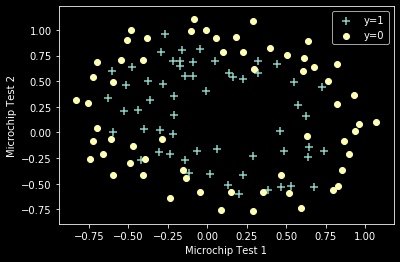

In [313]:
data = pd.read_csv('machine-learning-ex2-master\ex2\ex2data2.txt', header = None)

exams= data.loc[:,0:2]
X = data.loc[:,0:1]
y = data.loc[:,2]
m = y.size
pos = X.loc[y==1]
neg = X.loc[y==0]

theta = np.zeros((28,1))
y = y[:,np.newaxis]
def plot():
        plt.scatter(pos[0],pos[1], marker='+' ,s=60, label="y=1")
        plt.scatter(neg[0],neg[1], marker='o' , label='y=0')
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')
        plt.legend(loc='best')
plot()

In [314]:
def increaseFeatures(X1, X2, numOfPowers):
    out = np.ones((m,1))
    for i in range(1,numOfPowers+1):
        for j in range(0,i+1):
            out = np.append(out,np.power(X1,i-j)*(np.power(X2,j)),axis=1)
    return out

In [315]:
X1 = X[0][:,np.newaxis]
X2 = X[1][:,np.newaxis]
X28features = increaseFeatures(X1,X2,6)


In [316]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [317]:
def costFunction(theta, X, y, lamb):
    hx = sigmoid(X.dot(theta))

    J = -1/m*(np.log(hx).T.dot(y)+np.log(1-hx).T.dot(1-y))
    J += lamb/(2*m)*(sum(np.power(theta[1:],2)))
    return J

In [318]:
def gradient(theta,X, y, lamb):

    # fmin_bfgs gives one dim theta so need to add one more dim
    temp = sigmoid(np.dot(X, theta[...,np.newaxis]))
    temp = temp-y
    temp = np.dot(X.T, temp)
    temptheta = np.copy(theta)
    temptheta[0] = 0
    temptheta = temptheta[:,np.newaxis]
    theta = (1/m) * temp + (lamb/m) * temptheta
    return theta.flatten()

In [319]:
def predict(input, theta):
    p =  sigmoid(input.dot(theta.T)) > .5
    return p.astype('int')

In [320]:

lamb = 0
res = fmin_bfgs(costFunction,theta, args=(X28features,y,lamb),fprime=gradient)
print(sum(predict(X28features,res)==y.flatten())/m)

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547
0.9152542372881356


In [321]:
# Found online to graph the decision Boundry
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta = fmin_bfgs(costFunction,mytheta, args=(myX,myy,mylambda),fprime=gradient)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    pred = sum(predict(myX,theta)==myy.flatten())/m
    plt.title(pred)



Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


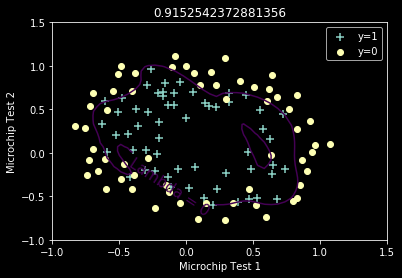

In [322]:
plot()
plotBoundary(theta,X28features,y) 

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


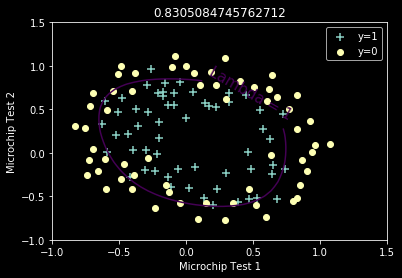

In [323]:
plot()
plotBoundary(theta,X28features,y,1) 

Optimization terminated successfully.
         Current function value: 0.680722
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11


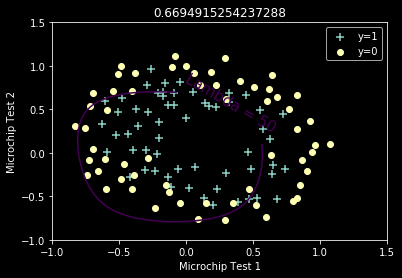

In [324]:
plot()
plotBoundary(theta,X28features,y,50) 

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


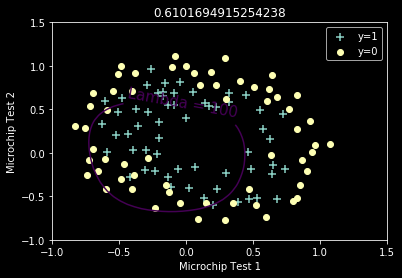

In [325]:
plot()
plotBoundary(theta,X28features,y,100) 